# Term Spé : Exploiter, à l’aide d’un langage de programmation, des données astronomiques ou satellitaires pour tester les 2ème et 3ème lois de Kepler.

# Obtention des positions de Mars et tracé de sa trajectoire

In [1]:
# import des modules scientifiques
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import csv # pour la lecture des données extraites sur les positions de Mars

In [3]:
from math import sqrt, pi # utile pour quelques calculs

## Obtention des données d'éphémérides :
À partir du site IMCCE : https://www.imcce.fr/fr/ephemerides/ et plus précisément https://ssp.imcce.fr/forms et même exactement https://ssp.imcce.fr/forms/ephemeris

<video controls src="ephemerides-tuto.mp4" width="800">Récupérer les données d'éphémérides IMCCE</video>

On peut aussi consulter les ressources d'accompagnement sur Eduscol : https://eduscol.education.fr/cid144120/physique-chimie-bac-2021.html

## Extraction des données depuis le fichier csv téléchargé

In [5]:
# on récupère avec le code suivant une liste de dictionnaires (OrderedDict) 
# dont les clefs sont indiquées par les descripteurs
with open('ephemerides/marsH.csv') as source:
    donnees = csv.DictReader(source, delimiter=";")
    descripteurs = donnees.fieldnames
    donnees = list(donnees)

# exemple de ce qu'on peut visualiser :
print(descripteurs)
print(donnees[0])
for (clef, valeur) in donnees[0].items():
    print(f"{clef} : {valeur}")

['Date (undefined)', 'px (au)', 'py (au)', 'pz (au)', 'Dobs (au)', 'Phase (deg)', 'VMag (mag)', 'vx (au/d)', 'vy (au/d)', 'vz (au/d)', 'RV (km/s)']
OrderedDict([('Date (undefined)', '2019-09-30T00:00:00.000'), ('px (au)', '-1.641110665683'), ('py (au)', '0.245599471875'), ('pz (au)', '0.045412409093'), ('Dobs (au)', '1.660007712182'), ('Phase (deg)', '0'), ('VMag (mag)', '0.68'), ('vx (au/d)', '-0.001549426918'), ('vy (au/d)', '-0.012643236448'), ('vz (au/d)', '-0.000226920003'), ('RV (km/s)', '-0.5973458')])
Date (undefined) : 2019-09-30T00:00:00.000
px (au) : -1.641110665683
py (au) : 0.245599471875
pz (au) : 0.045412409093
Dobs (au) : 1.660007712182
Phase (deg) : 0
VMag (mag) : 0.68
vx (au/d) : -0.001549426918
vy (au/d) : -0.012643236448
vz (au/d) : -0.000226920003
RV (km/s) : -0.5973458


## Nous sommes intéressés seulement par les dates et les coordonnées en x et y

In [6]:
dates = [donnee["Date (undefined)"] for donnee in donnees]
x = [donnee["px (au)"] for donnee in donnees]
y = [donnee["py (au)"] for donnee in donnees]

###  Mise en forme de ces données

In [7]:
# mise en forme : on enlève la partie h:min:s
dates = [date[:10] for date in dates]
# après mise en forme
print(dates[0])
print(dates[1])

2019-09-30
2019-10-07


In [8]:
dt = int(dates[1][-2:]) - int(dates[0][-2:]) # durée en j entre 2 dates 
dt

-23

In [9]:
# on peut aussi créer une liste d'instants (en j) correspondant à chaque date en commençant à t=0
t = [dt*i for i in range(len(dates))]
# début :
t[:4]

[0, -23, -46, -69]

In [10]:
# mise en forme : on convertit la chaine de caractères en nombre 
# (en remplaçant d'abord la virgule par un point)
x = [float(pos.replace(',','.')) for pos in x]
y = [float(pos.replace(',','.')) for pos in y]
# après mise en forme
print(x[0])
print(y[0])

-1.641110665683
0.245599471875


In [11]:
ua = 149_597_870_700 # valeur d'une unité astronomique en m (définition de 2012)

In [12]:
# Pour les manipulations à venir, on convertit ces listes en array de numpy
t, x, y = np.array(t), np.array(x), np.array(y)

# conversion des distances en m :
# x, y = x*ua, y*ua
# print(x[0])
# print(y[0])

## Tracé des positions de Mars au cours du temps


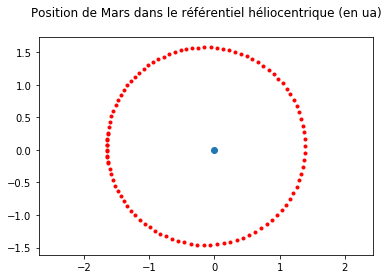

In [13]:
plt.scatter(0, 0)
plt.plot(x, y, 'r.')
plt.axis("equal")
plt.title("Position de Mars dans le référentiel héliocentrique (en ua)\n")
plt.show()

## Distance Mars-Soleil au cours du temps (en ua)

In [14]:
d = [donnee["Dobs (au)"] for donnee in donnees]
d = [float(pos.replace(',','.')) for pos in d]
d = np.array(d)

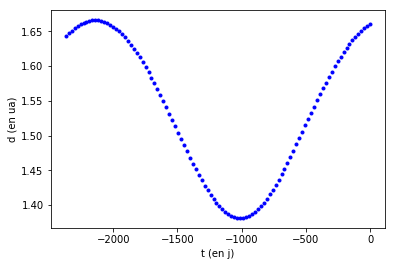

In [15]:
plt.plot(t, d, 'b.')
plt.xlabel("t (en j)")
plt.ylabel("d (en ua)")
plt.show()

## Script automatique à partir d'un fichier csv de données sur une planète

In [16]:
def bilan(donnees, referentiel='?', astre='?', ua_bool=True, show=True):
    """ donnees est le fichier de données éphémérides de l'astre """
    with open(donnees) as source:
        donnees = list(csv.DictReader(source, delimiter=";"))
    dates = [donnee["Date (undefined)"][:10] for donnee in donnees]
    dt = int(dates[1][-2:]) - int(dates[0][-2:])
    t = np.array([dt*i for i in range(len(dates))])
    x = np.array([float(donnee["px (au)"].replace(',','.')) for donnee in donnees])
    y = np.array([float(donnee["py (au)"].replace(',','.')) for donnee in donnees])
    d = np.array([float(donnee["Dobs (au)"].replace(',','.')) for donnee in donnees])
    unite = 'ua'
    if not ua_bool:
        ua = 149_597_870_700
        x, y, d = x*ua, y*ua, d*ua
        unite = 'm'
        
    def graphe():      
        plt.scatter(0, 0)
        plt.plot(x, y, 'r.')
        plt.axis("equal")
        plt.title(f"Position de {astre} (en {unite}) dans le référentiel {referentiel}\n")
        plt.show()

        plt.plot(t, d, 'bo-')
        plt.xlabel("t (en j)")
        plt.ylabel(f"d (en {unite})")

        plt.show()
        
    if show:
        graphe()
    return dates, t, x, y, d

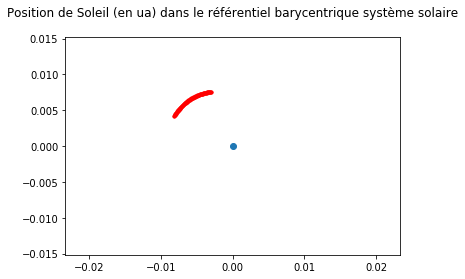

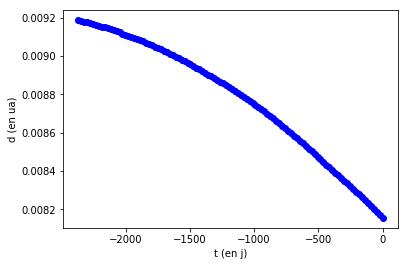

In [17]:
donnees = "ephemerides/soleilB.csv"
bilan_soleil = bilan(donnees, astre='Soleil', referentiel="barycentrique système solaire")

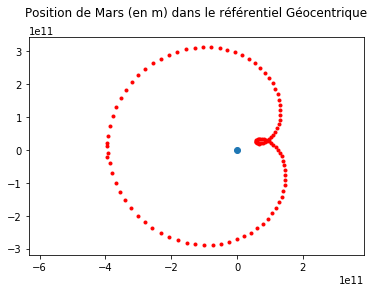

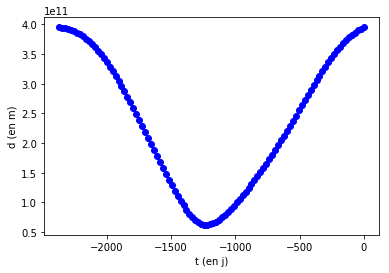

In [18]:
donnees = "ephemerides/marsG.csv"
bilan_mars = bilan(donnees, astre='Mars', referentiel='Géocentrique', ua_bool=False)

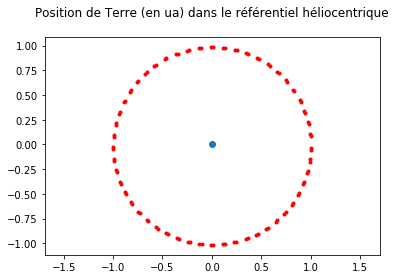

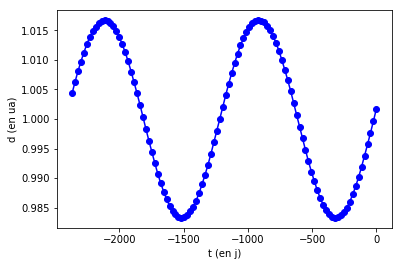

In [19]:
donnees = "ephemerides/terreH.csv"
bilan_terre = bilan(donnees, astre='Terre', referentiel='héliocentrique')

## Tracé des trajectoires de Mercure, Vénus, Terre, Mars

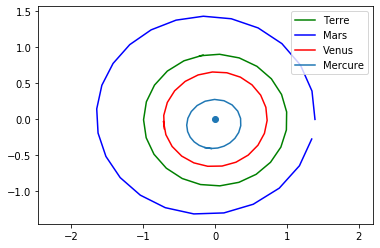

In [19]:
dates, t, x1, y1, d = bilan("ephemerides/terre-heliocentrique-dt16.csv", astre='Terre', referentiel='héliocentrique', show=False)
dates, t, x2, y2, d = bilan("ephemerides/mars-heliocentrique-dt29.csv", astre='Mars', referentiel='héliocentrique', show=False)
dates, t, x3, y3, d = bilan("ephemerides/venus-heliocentrique-dt10.csv", astre='Venus', referentiel='héliocentrique', show=False)
dates, t, x4, y4, d = bilan("ephemerides/mercure-heliocentrique-dt4.csv", astre='Mercure', referentiel='héliocentrique', show=False)

plt.scatter(0, 0)
plt.plot(x1, y1, 'g-', label='Terre')
plt.plot(x2, y2, 'b-', label='Mars')
plt.plot(x3, y3, 'r-', label='Venus')
plt.plot(x4, y4, '-', label='Mercure')
plt.axis("equal")
plt.legend()
plt.title(f"")
plt.show()

# Autre source d'éphémérides (JPL HORIZONS)
Source : https://ssd.jpl.nasa.gov/horizons.cgi

Documentation générale HORIZONS : https://ssd.jpl.nasa.gov/?horizons_doc#site

Doc interface Web : https://ssd.jpl.nasa.gov/?horizons_tutorial


<video controls src="jpl_horizons-tuto.mp4" width="800">Récupérer les données d'éphémérides IMCCE</video>


##  Script pour traiter les données de JPL HORIZONS

In [20]:
def jpl_horizons(donnees, referentiel='?', astre='?', unite='ua', show=True):
    """ donnees est le fichier de données éphémérides de l'astre' 
    Utilise une source de données issue de JPL HORIZONS """
    with open(donnees) as source:
        donnees = list(csv.DictReader(source, delimiter=","))
    dates = [donnee["Calendar Date (TDB)"][6:-14] for donnee in donnees]
    dates_Julien = [float(donnee["JDTDB"].replace(',','.')) for donnee in donnees]
    dt = dates_Julien[1] - dates_Julien[0]
    t = np.array([dt*i for i in range(len(dates))])
    x = np.array([float(donnee["X"].replace(',','.')) for donnee in donnees])
    y = np.array([float(donnee["Y"].replace(',','.')) for donnee in donnees])
        
    def graphe():      
        plt.scatter(0, 0)
        plt.plot(x, y, 'r.')
        plt.axis("equal")
        plt.title(f"Position de {astre} (en {unite}) dans le référentiel {referentiel}\n")
        plt.show()
        
    if show:
        graphe()
    return dates, t, x, y

### On propose de s'intéresser aux satellites de Neptune.
https://fr.wikipedia.org/wiki/Satellites_naturels_de_Neptune

## Naiad, Thalassa, Despina, Galatea sont proches de Neptune avec une faible excentricité et une période de révolution de quelques heures

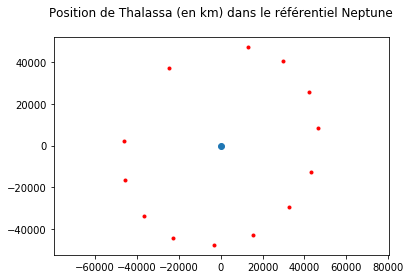

In [21]:
donnees = "ephemerides/naiad-neptune.csv"
naiad_bilan = jpl_horizons(donnees, referentiel='Neptune', astre='Naiad', unite='km', show=False)
donnees = "ephemerides/thalassa-neptune.csv"
thalassa_bilan = jpl_horizons(donnees, referentiel='Neptune', astre='Thalassa', unite='km', show=True)
donnees = "ephemerides/despina-neptune.csv"
despina_bilan = jpl_horizons(donnees, referentiel='Neptune', astre='Despina', unite='km', show=False)
donnees = "ephemerides/galatea-neptune.csv"
galatea_bilan = jpl_horizons(donnees, referentiel='Neptune', astre='Galatea', unite='km', show=False)

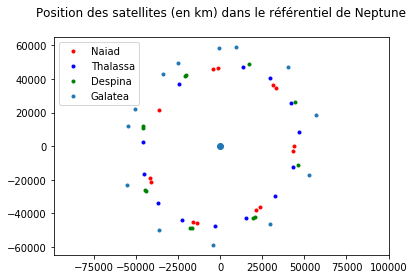

In [22]:
naiad_x, naiad_y = naiad_bilan[2], naiad_bilan[3]
thalassa_x, thalassa_y = thalassa_bilan[2], thalassa_bilan[3]
despina_x, despina_y = despina_bilan[2], despina_bilan[3]
galatea_x, galatea_y = galatea_bilan[2], galatea_bilan[3]

plt.scatter(0, 0)
plt.plot(naiad_x, naiad_y, 'r.', label='Naiad')
plt.plot(thalassa_x, thalassa_y, 'b.', label='Thalassa')
plt.plot(despina_x, despina_y, 'g.', label='Despina')
plt.plot(galatea_x, galatea_y, '.', label='Galatea')
plt.axis("equal")
plt.legend()
plt.title(f"Position des satellites (en km) dans le référentiel de Neptune\n")
plt.show()

## Triton, Néréid,  Halimède, Sao, Psamathée sont beaucoup plus éloignées de Neptune avec une fortee excentricité et une période de révolution de quelques jours à plusieurs années

In [23]:
donnees = "ephemerides/nereid-neptune.csv"
nereid_bilan = jpl_horizons(donnees, referentiel='Neptune', astre='Nereid', unite='km', show=False)
donnees = "ephemerides/sao-neptune.csv"
sao_bilan = jpl_horizons(donnees, referentiel='Neptune', astre='Sao', unite='km', show=False)
donnees = "ephemerides/halimede-neptune.csv"
halimede_bilan = jpl_horizons(donnees, referentiel='Neptune', astre='Halimede', unite='km', show=False)
donnees = "ephemerides/psamathee-neptune.csv"
psamathee_bilan = jpl_horizons(donnees, referentiel='Neptune', astre='Psamathee', unite='km', show=False)
donnees = "ephemerides/triton-neptune.csv"
triton_bilan = jpl_horizons(donnees, referentiel='Neptune', astre='Triton', unite='km', show=False)

<IPython.core.display.Javascript object>


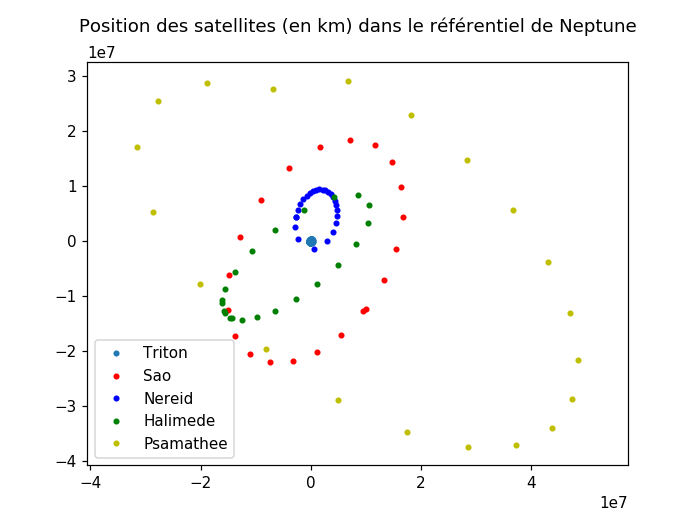

In [25]:
%matplotlib notebook 
# permet de zoomer dans la fenètre graphique

nereid_x, nereid_y = nereid_bilan[2], nereid_bilan[3]
triton_x, triton_y = triton_bilan[2], triton_bilan[3]
halimede_x, halimede_y = halimede_bilan[2], halimede_bilan[3]
sao_x, sao_y = sao_bilan[2], sao_bilan[3]
psamathee_x, psamathee_y = psamathee_bilan[2], psamathee_bilan[3]

plt.scatter(0, 0)
plt.plot(triton_x, triton_y, '.', label='Triton')
plt.plot(sao_x, sao_y, 'r.', label='Sao')
plt.plot(nereid_x, nereid_y, 'b.', label='Nereid')
plt.plot(halimede_x, halimede_y, 'g.', label='Halimede')
plt.plot(psamathee_x, psamathee_y, 'y.', label='Psamathee')
plt.axis("equal")
plt.legend()
plt.title(f"Position des satellites (en km) dans le référentiel de Neptune\n")
plt.show()

#  3ème loi de Kepler : $T^2 = k \times a^3$

Le carré de la période de révolution est proportionnelle au cube du demi grand-axe de l'ellipse, et ne dépend pas du satellite considéré.

La théorie indique que $k = \dfrac{4\pi ^2}{G M}$ ($M$ est la masse de l'astre attracteur, Neptune dans nos exemples).

M = 1,02.10^26 kg 

G = 6,67.10^-11 USI

## Extraction des données

Infos recueillies à partir du site 
https://fr.wikipedia.org/wiki/Satellites_naturels_de_Neptune

In [26]:
with open('ephemerides/satellites-neptune.csv') as source:
    donnees = csv.DictReader(source, delimiter=",")
    descripteurs = donnees.fieldnames
    donnees = list(donnees)

# exemple de ce qu'on peut visualiser :
for (clef, valeur) in donnees[0].items():
    print(f"{clef} : {valeur}")
    
print("\nLes satellites étudiés sont :")
for s in donnees:
    print(s['Satellite'])

Satellite : Triton
Période (j) : 5,87
Excentricité : 1,6E-05
Demi grand axe (km) : 354800

Les satellites étudiés sont :
Triton
Néréide
Halimède
Sao
Psamathée


## On garde uniquement les périodes et demi grands-axes

In [27]:
a = [donnee["Demi grand axe (km)"] for donnee in donnees]
T = [donnee["Période (j)"] for donnee in donnees]

## Mise en forme numérique puis conversion en np.array et unité SI

In [28]:
a = [float(valeur.replace(",",".")) for valeur in a]
T = [float(valeur.replace(",",".")) for valeur in T]
a = np.array(a) * 1000 # 1 km = 1000 m
T = np.array(T) * 24 * 3600 # 1 j = 24 h * 3600 s

## Tracé de $T^2$ en fonction de $a^3$

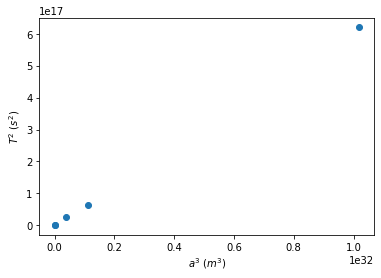

In [29]:
%matplotlib inline
abscisse, ordonnee = a**3, T**2
plt.plot(abscisse, ordonnee, 'o')
plt.xlabel("$a^3$ ($m^3$)")
plt.ylabel("$T^2$ ($s^2$)")
plt.show()

### Modélisation par une fonction linéaire (3ème loi Kepler : $T^2 = k \times a^3$)

In [30]:
# module utile pour la modélisation
from scipy.optimize import curve_fit

In [31]:
# fonction linéaire pour le modèle de la 3ème loi de Kepler
def modele_lineaire(x, k):
    return k * x

In [32]:
# obtention des paramètres du modèle (le coefficient directeur k)
modele, _ = curve_fit(modele_lineaire, abscisse, ordonnee)
k = modele[0]
print(f"k = {k:#.2g} USI")

k = 6.1e-15 USI


In [33]:
# Comparaison avec la valeur théorique :
M = 1.02*10**26
G = 6.67*10**(-11)
k_theorie = 4 * pi**2 / (G * M)
print(f"k_theorie = {k_theorie:#.2g} USI")

# écart relatif
print(f"écart relatif entre théorie et expérience : {(k - k_theorie)/k_theorie:.0%}")

k_theorie = 5.8e-15 USI
écart relatif entre théorie et expérience : 5%


<IPython.core.display.Javascript object>


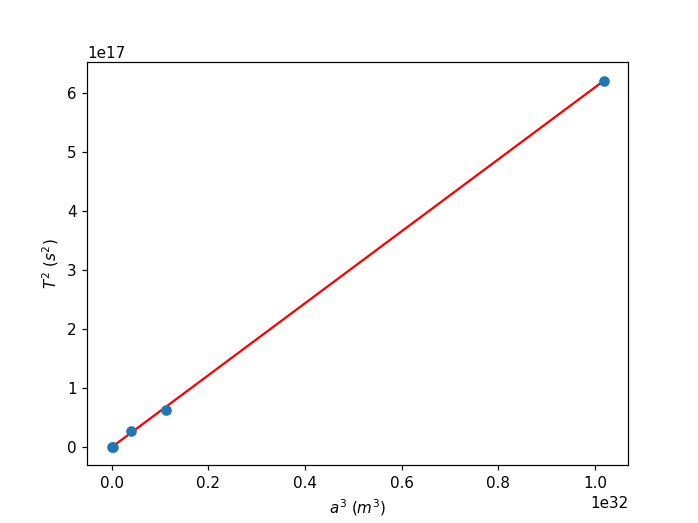

In [34]:
%matplotlib notebook
### PENSER  A  ZOOMER VERS L'ORIGINE POUR VOIR LES PREMIERS POINTS ###
plt.plot(abscisse, k * a**3, 'r-')
plt.plot(abscisse, ordonnee, 'o')
plt.xlabel("$a^3$ ($m^3$)")
plt.ylabel("$T^2$ ($s^2$)")
plt.show()

# 2ème loi de Kepler
Le rayon vecteur (liant Neptune à un satellite) balaie des aires égales pendant des durées égales.

### Détermination de l'aire balayée entre 2 dates :
Pour essayer de vérifier la 2eme loi de Kepler, on propose d'approximer l'aire balayée (par le rayon vecteur) par l'aire d'un triangle : cette approximation est raisonnable si la durée entre les 2 dates est suffisament courte pour que le tronçon d'ellipse s'apparente à un segment de droite.

Nous aurons besoin d'une formule pour calculer l'aire d'un triangle à partir des longueurs de ses côtés :

Pour calculer l'aire d'un triangle dont les longueurs des côtés sont a, b et c et le demi-périmètre $ p={\dfrac {a+b+c}{2}}$, on peut utiliser la formule de Héron :
$S={\dfrac {1}{4}}{\sqrt {(a+b+c)(-a+b+c)(a-b+c)(a+b-c)}}={\sqrt {p(p-a)(p-b)(p-c)}}$



On rappelle par ailleurs que la distance entre deux points de coordonnées $(x_A, y_A)$ et $(x_B, y_B)$ est :
$d = \sqrt{(x_A - x_B)^2 + (y_A - y_B)^2 }$.

#### Fonction qui calcule la surface d'un triangle dont un sommet est le centre du repère

In [20]:
def surface(xA, yA, xB, yB):
    """ calcule la surface d'un triangle OAB (O est l'origine du repère) 
    xA, yA, xB, yB sont les coordonnées des sommets A et B """
    a = sqrt(xA**2 + yA**2)
    b = sqrt(xB**2 + yB**2)
    c = sqrt((xB - xA)**2 + (yB - yA)**2)
    p = (a + b + c) / 2 
    s = (1/4) * sqrt(p * (p-a) * (p-b) * (p-c)) # formule de Héron
    return s

##  Travail sur Halimède

In [21]:
def jpl_horizons(donnees):
    """ donnees est le fichier de données éphémérides du satellite 
    Utilise une source de données issue de JPL HORIZONS """
    with open(donnees) as source:
        donnees = list(csv.DictReader(source, delimiter=","))
    dates = [donnee["Calendar Date (TDB)"][6:-14] for donnee in donnees]
    dates_Julien = [float(donnee["JDTDB"].replace(',','.')) for donnee in donnees]
    dt = dates_Julien[1] - dates_Julien[0]
    t = np.array([dt*i for i in range(len(dates))])
    x = np.array([float(donnee["X"].replace(',','.')) for donnee in donnees])
    y = np.array([float(donnee["Y"].replace(',','.')) for donnee in donnees])
    return dates, t, x, y

In [37]:
# pour tracer des polygones (pour nous des triangles)
from matplotlib.patches import Polygon

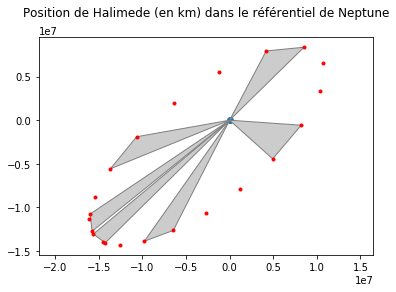

Entre 2020-Jan-01 et 2020-Jan-01 (durée 100.0 j): aire balayée = 4.2e+12 km^2
Entre 2021-Feb-04 et 2021-Feb-04 (durée 100.0 j): aire balayée = 4.2e+12 km^2
Entre 2022-Mar-11 et 2022-Mar-11 (durée 100.0 j): aire balayée = 4.1e+12 km^2
Entre 2023-Apr-15 et 2023-Apr-15 (durée 100.0 j): aire balayée = 4.2e+12 km^2
Entre 2024-May-19 et 2024-May-19 (durée 100.0 j): aire balayée = 4.2e+12 km^2
Entre 2025-Jun-23 et 2025-Jun-23 (durée 100.0 j): aire balayée = 4.3e+12 km^2


In [38]:
%matplotlib inline

donnees = "ephemerides/halimede-neptune.csv"

dates, t, x, y = jpl_horizons(donnees)

fig, ax = plt.subplots()

plt.scatter(0, 0)
plt.plot(x, y, 'r.')
plt.axis("equal")
plt.title(f"Position de Halimede (en km) dans le référentiel de Neptune\n")

pas = 4 # 'pas' entre les zones où on trace un triangle et calcule son aire
for i in range(0, len(x), pas):
    xA, yA, xB, yB = x[i], y[i], x[i+1], y[i+1]
    triangle = Polygon([(0,0),(xA, yA),(xB, yB)], facecolor='0.8', edgecolor='0.5')
    ax.add_patch(triangle)

plt.show()

for i in range(0, len(x), pas):
    xA, yA, xB, yB = x[i], y[i], x[i+1], y[i+1]
    dateA, dateB = dates[i], dates[i+1]
    a, b = t[i], t[i+1]
    s = surface(xA, yA, xB, yB)
    print(f"Entre {dateA} et {dateA} (durée {b-a} j): aire balayée = {s:#.2g} km^2")

#  Script auto

In [39]:
def kepler_2(donnees, nom, pas):
    """ Reprend la démarche vue avec Halimède pour un satellites dont l'éphéméride est dans le fichier donnees """
    
    dates, t, x, y = jpl_horizons(donnees)

    fig, ax = plt.subplots()

    plt.scatter(0, 0)
    plt.plot(x, y, 'r.')
    plt.axis("equal")
    plt.title(f"Position de {nom} (en km) dans le référentiel de Neptune\n")

    for i in range(0, len(x), pas):
        xA, yA, xB, yB = x[i], y[i], x[i+1], y[i+1]
        triangle = Polygon([(0,0),(xA, yA),(xB, yB)], facecolor='0.8', edgecolor='0.5')
        ax.add_patch(triangle)

    plt.show()

    for i in range(0, len(x), pas):
        xA, yA, xB, yB = x[i], y[i], x[i+1], y[i+1]
        dateA, dateB = dates[i], dates[i+1]
        a, b = t[i], t[i+1]
        s = surface(xA, yA, xB, yB)
        print(f"Entre {dateA} et {dateA} (durée {b-a} j): aire balayée = {s:#.2g} km^2")

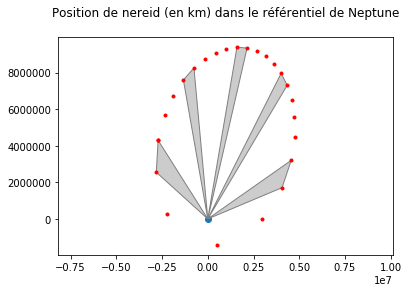

Entre 2020-Jan-01 et 2020-Jan-01 (durée 15.0 j): aire balayée = 6.5e+11 km^2
Entre 2020-Mar-16 et 2020-Mar-16 (durée 15.0 j): aire balayée = 6.5e+11 km^2
Entre 2020-May-30 et 2020-May-30 (durée 15.0 j): aire balayée = 6.6e+11 km^2
Entre 2020-Aug-13 et 2020-Aug-13 (durée 15.0 j): aire balayée = 6.6e+11 km^2
Entre 2020-Oct-27 et 2020-Oct-27 (durée 15.0 j): aire balayée = 6.6e+11 km^2


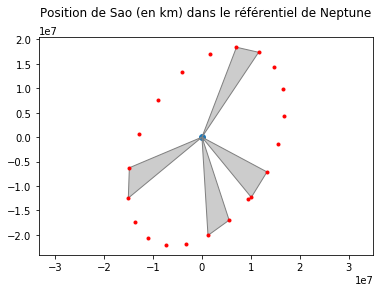

Entre 2020-Jan-01 et 2020-Jan-01 (durée 145.0 j): aire balayée = 1.1e+13 km^2
Entre 2022-May-20 et 2022-May-20 (durée 145.0 j): aire balayée = 1.1e+13 km^2
Entre 2024-Oct-06 et 2024-Oct-06 (durée 145.0 j): aire balayée = 1.1e+13 km^2
Entre 2027-Feb-23 et 2027-Feb-23 (durée 145.0 j): aire balayée = 1.1e+13 km^2


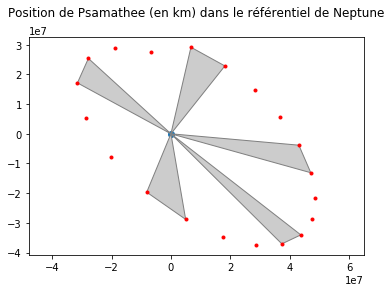

Entre 2020-Jan-01 et 2020-Jan-01 (durée 460.0 j): aire balayée = 4.7e+13 km^2
Entre 2025-Jan-14 et 2025-Jan-14 (durée 460.0 j): aire balayée = 4.8e+13 km^2
Entre 2030-Jan-28 et 2030-Jan-28 (durée 460.0 j): aire balayée = 4.4e+13 km^2
Entre 2035-Feb-11 et 2035-Feb-11 (durée 460.0 j): aire balayée = 4.2e+13 km^2
Entre 2040-Feb-25 et 2040-Feb-25 (durée 460.0 j): aire balayée = 4.0e+13 km^2


In [41]:
donnees = "ephemerides/nereid-neptune.csv"
nom = "nereid"
pas = 5
kepler_2(donnees, nom, pas)

donnees = "ephemerides/sao-neptune.csv"
nom = "Sao"
pas = 6
kepler_2(donnees, nom, pas)

donnees = "ephemerides/psamathee-neptune.csv"
nom = "Psamathee"
pas = 4
kepler_2(donnees, nom, pas)